# Exploratory Dry Weather Patterns

In [1]:
import datetime
import calendar
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,4

# Load project data

In [2]:
PROJECT_FOLDER = '../../datasets/radon-medium/'

def load_series(fname, name):
    path = PROJECT_FOLDER + fname + '.csv'
    xs = pd.read_csv(path, parse_dates=['time'])
    xs = xs.set_index('time')[name].fillna(0)
    xs = xs.resample('5T').pad()
    xs = xs.rename(fname)
    return xs


flow = load_series('flow1', 'flow')

rainfall = load_series('rainfall1', 'rainfall')

data_frame = pd.concat([flow, rainfall], axis=1)
data_frame['day'] = data_frame.index.map(lambda x: x.date())
data_frame = data_frame['2015-01-01': '2017-11-09']
print(data_frame.head())
print(data_frame.tail())

                         flow1  rainfall1         day
time                                                 
2015-01-01 00:00:00  78.823807        0.0  2015-01-01
2015-01-01 00:05:00  78.472908        0.0  2015-01-01
2015-01-01 00:10:00  78.211464        0.0  2015-01-01
2015-01-01 00:15:00  76.295776        0.0  2015-01-01
2015-01-01 00:20:00  76.811760        0.0  2015-01-01
                         flow1  rainfall1         day
time                                                 
2017-11-09 23:35:00  73.019638        0.0  2017-11-09
2017-11-09 23:40:00  72.679214        0.0  2017-11-09
2017-11-09 23:45:00  72.036858        0.0  2017-11-09
2017-11-09 23:50:00  71.264633        0.0  2017-11-09
2017-11-09 23:55:00  69.506363        0.0  2017-11-09


# Find dry days

In [17]:
data_frame['precipitation_24h'] = data_frame.rainfall1.rolling(24*12).sum()
df = data_frame.groupby(by=data_frame.day).precipitation_24h.sum()
df = df[df < 0.1]
dry_days = set(df.index)
print('Found {} days'.format(len(dry_days)))

Found 442 days


# Mean DWP

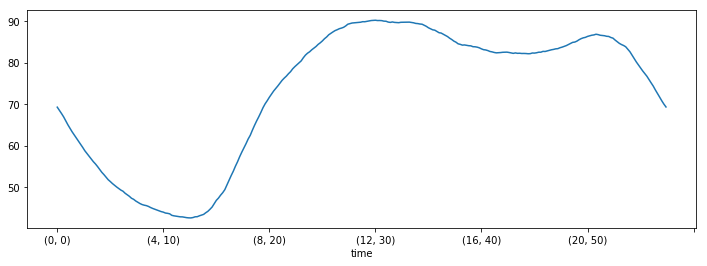

In [18]:
df_dry_days = data_frame[data_frame.day.isin(dry_days)]
df = df_dry_days.reset_index()
daily_pattern = df.groupby(by=[df.time.map(lambda x : (x.hour, x.minute))]).flow1.mean()
daily_pattern.plot()
plt.show()

## How the DWP changes during the year

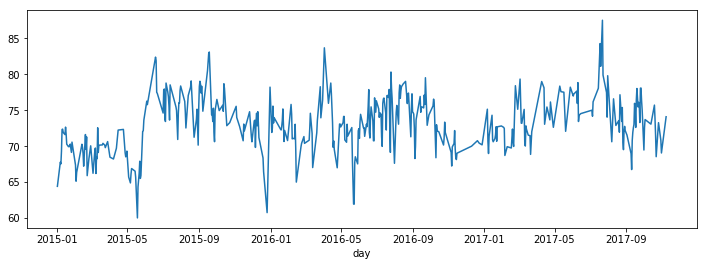

In [19]:
df = df_dry_days.groupby(by=['day']).flow1.mean()
df.plot()
plt.show()